In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

In [ ]:
# This function is for loading the MNIST handwritten dataset.
# You do not have to change anything.

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return x_train, y_train, x_test, y_test

In [ ]:
# This function is for visualize first 10 image.
# You do not have to change anything.

def plot_first_ten_images(images, labels):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

In [ ]:

def prepare_data(x_train, y_train, x_test, y_test):
    """
    Preprocesses the given training and test data by performing normalization, reshaping,
    and one-hot encoding. Returns preprocessed features and labels.

    Parameters:
        x_train (numpy.ndarray): Training feature data (images).
        y_train (numpy.ndarray): Training labels (categories).
        x_test (numpy.ndarray): Test feature data (images).
        y_test (numpy.ndarray): Test labels (categories).

    Returns:
        x_train (numpy.ndarray): Normalized and reshaped training feature data.
        y_train (numpy.ndarray): One-hot encoded training labels.
        x_test (numpy.ndarray): Normalized and reshaped test feature data.
        y_test (numpy.ndarray): One-hot encoded test labels.
    """
    # Task 1 - Normalization
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Task 2 - Reshape Images
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    # Task 3 - One-Hot Encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Task 4 - Return the processed data
    return x_train, y_train, x_test, y_test


In [ ]:

def build_cnn_model():
    """
    Builds and returns a Convolutional Neural Network (CNN) model for the MNIST dataset.

    Returns:
        model (tensorflow.keras.Model): The constructed CNN model.
    """
    model = Sequential()

    # First convolutional layer with input shape set for MNIST (28, 28, 1)
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the 2D feature maps into a 1D feature vector
    model.add(Flatten())

    # Fully connected dense layer with L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Dropout for regularization

    # Output layer with 10 units for the 10 classes, using softmax activation
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:

def compile_and_train(model, x_train, y_train, x_test, y_test):
    """
    Compiles and trains the given CNN model using the provided datasets.

    Parameters:
        model (tensorflow.keras.Model): The CNN model to be compiled and trained.
        x_train (numpy.ndarray): Training features.
        y_train (numpy.ndarray): Training labels.
        x_test (numpy.ndarray): Test features.
        y_test (numpy.ndarray): Test labels.

    Returns:
        history (tensorflow.keras.callbacks.History): The training history object.
    """

    # Optional Task - Declare callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]

    # Task 1 - Compile Function
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Task 2 - Fit Function
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        callbacks=callbacks
    )

    return history

In [ ]:
# "plot_metrics()" function help to plot loss and accuracy figure of the training and validation.

def plot_metrics(history): # Insert parameter name

    # Plot traning and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot traning and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# "evaluate_and_confusion_matrix()" function display the evalutaion result after training and testing the model.

def evaluate_and_confusion_matrix(model, x_train, y_train, x_test, y_test): # Insert parameters name

    # Predictions for the training set
    y_train_pred = model.predict(x_train)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)
    y_true_train = np.argmax(y_train, axis=1)

    # Predictions for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate and print the training and test accuracy
    train_accuracy = accuracy_score(y_true_train, y_train_pred_classes)
    test_accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Calculate and print the F1 score for the test set
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    print(f"Test F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

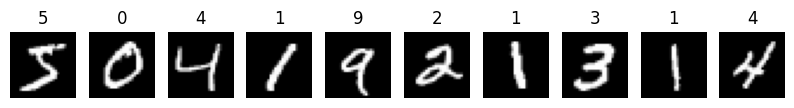

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8329 - loss: 0.9425 - val_accuracy: 0.9725 - val_loss: 0.2351 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9546 - loss: 0.2959 - val_accuracy: 0.9805 - val_loss: 0.1964 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9624 - loss: 0.2478 - val_accuracy: 0.9828 - val_loss: 0.1817 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9656 - loss: 0.2341 - val_accuracy: 0.9854 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9688 - loss: 0.2206 - val_accuracy: 0.9806 - val_loss: 0.1755 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9688 - loss: 0.2168 - val_accuracy: 0.9833 - val_loss: 0.1664 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accura

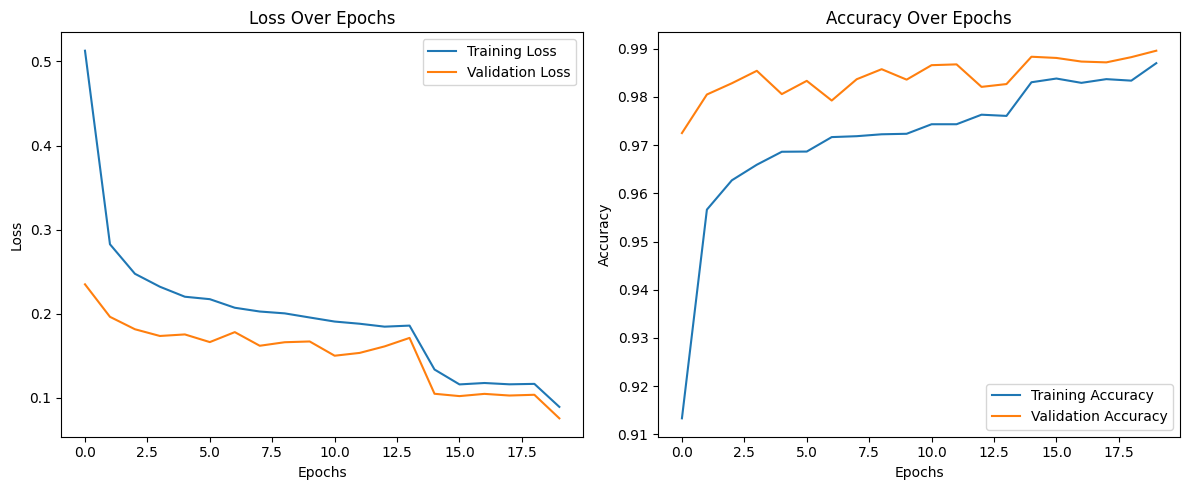

Training Accuracy: 0.99
Test Accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


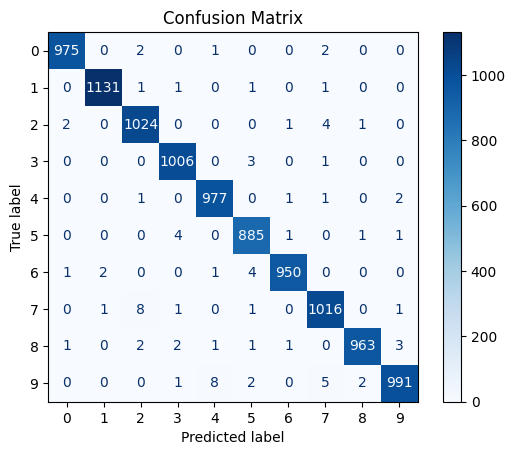

In [ ]:
# --------------------------------------This is the main section------------------------------

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def load_data():
    """
    Load the MNIST dataset.

    Returns:
        Tuple: Training and testing data (images and labels).
    """
    return mnist.load_data()

def plot_first_ten_images(images, labels):
    """
    Plot the first 10 images and their labels.

    Parameters:
        images (numpy.ndarray): A collection of image data.
        labels (numpy.ndarray): Corresponding labels for the images.
    """
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(labels[i])
    plt.show()

def plot_metrics(history):
    """
    Plot the training and validation metrics.

    Parameters:
        history (tensorflow.keras.callbacks.History): Training history object.
    """
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Task 1: Dataset loading
(x_train, y_train), (x_test, y_test) = load_data()

# Task 2: First 10 Images Visualization
plot_first_ten_images(x_train, y_train)

# Task 3: Prepare Dataset
x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test)

# Task 4: Build the model
model = build_cnn_model()

# Task 5: Compile and Train
history = compile_and_train(model, x_train, y_train, x_test, y_test)

# Task 6: Plotting Training Metrics
plot_metrics(history)

# Task 7: Model Evaluation and Confusion Matrix Visualization
def evaluate_and_confusion_matrix(model, x_train, y_train, x_test, y_test):
    """
    Evaluate the model and plot a confusion matrix.

    Parameters:
        model (tensorflow.keras.Model): Trained model.
        x_train (numpy.ndarray): Flattened training data.
        y_train (numpy.ndarray): One-hot encoded training labels.
        x_test (numpy.ndarray): Flattened testing data.
        y_test (numpy.ndarray): One-hot encoded testing labels.
    """
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import numpy as np

    # Evaluate on training data
    train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    print(f"Training Accuracy: {train_accuracy:.2f}")

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Predict and generate confusion matrix for test data
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_and_confusion_matrix(model, x_train, y_train, x_test, y_test)